In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import median sale price PSF data by city and transpose
sale_df = pd.read_csv('City_MedianListingPricePerSqft_AllHomes.csv', encoding = "Latin", index_col='RegionName')
sale_df = sale_df.sort_values('2019-09', ascending = False)

# Drop 'N/A' Columns
sale_df = sale_df.dropna(1)
sale_df.head()

,State,CountyName,SizeRank,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
RegionName,,,,,,,,,,,,,,,
Sagaponack,NY,Suffolk County,7239,1738.361815,1690.238278,1651.984127,1675.674695,1707.188105,1661.111111,1744.964292,1738.361815,1738.361815,1738.361815,1590.909091,1714.300047
Aspen,CO,Pitkin County,4391,1597.096202,1623.341457,1664.225627,1681.530110,1700.907150,1692.047205,1696.721864,1687.060548,1700.354610,1658.333333,1658.333333,1652.432340
Palo Alto,CA,Santa Clara County,712,1503.666979,1505.460218,1519.176225,1489.542727,1530.627871,1534.917460,1569.475505,1590.515276,1633.804019,1581.272085,1563.915134,1642.265385
Del Mar,CA,San Diego County,6607,1537.803626,1755.105627,1802.456499,1683.518467,1713.541667,1731.892547,1606.280193,1637.013154,1606.280193,1545.710267,1541.756947,1641.598171
Beverly Hills,CA,Los Angeles County,1568,1568.016687,1568.016687,1613.924051,1608.948820,1613.911832,1513.132851,1547.864740,1534.062787,1559.375000,1561.176927,1570.740514,1622.989989


In [5]:
# Create a dataframe of the cities with the PSF prices above X
top_psf = int(input('What PSF for the high?' ))
top_sale = sale_df[sale_df['2019-09'] > top_psf]
del top_sale['SizeRank']
high_count = top_sale['State'].count()
print(f'Total properties with median price > ${top_psf}/PSF: {high_count} cities')
top_sale.head(high_count)

What PSF for the high?1300
Total properties with median price > $1300/PSF: 8 cities


,State,CountyName,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
RegionName,,,,,,,,,,,,,,
Sagaponack,NY,Suffolk County,1738.361815,1690.238278,1651.984127,1675.674695,1707.188105,1661.111111,1744.964292,1738.361815,1738.361815,1738.361815,1590.909091,1714.300047
Aspen,CO,Pitkin County,1597.096202,1623.341457,1664.225627,1681.530110,1700.907150,1692.047205,1696.721864,1687.060548,1700.354610,1658.333333,1658.333333,1652.432340
Palo Alto,CA,Santa Clara County,1503.666979,1505.460218,1519.176225,1489.542727,1530.627871,1534.917460,1569.475505,1590.515276,1633.804019,1581.272085,1563.915134,1642.265385
Del Mar,CA,San Diego County,1537.803626,1755.105627,1802.456499,1683.518467,1713.541667,1731.892547,1606.280193,1637.013154,1606.280193,1545.710267,1541.756947,1641.598171
Beverly Hills,CA,Los Angeles County,1568.016687,1568.016687,1613.924051,1608.948820,1613.911832,1513.132851,1547.864740,1534.062787,1559.375000,1561.176927,1570.740514,1622.989989
Fisher Island,FL,Miami-Dade County,1318.154519,1378.213266,1388.891858,1377.755511,1413.043478,1328.000000,1369.565217,1287.615368,1262.755102,1323.993756,1388.891858,1362.149312
Telluride,CO,San Miguel County,1141.188960,1141.207889,1223.357818,1229.171354,1283.109176,1297.624436,1347.708895,1291.199456,1347.708895,1360.073767,1360.073767,1345.050215
Menlo Park,CA,San Mateo County,1283.985102,1309.104671,1196.070292,1101.398601,1265.295674,1304.154303,1365.137615,1292.241379,1260.252366,1273.884713,1311.995495,1319.705660


Text(0.5, 0, 'Month')

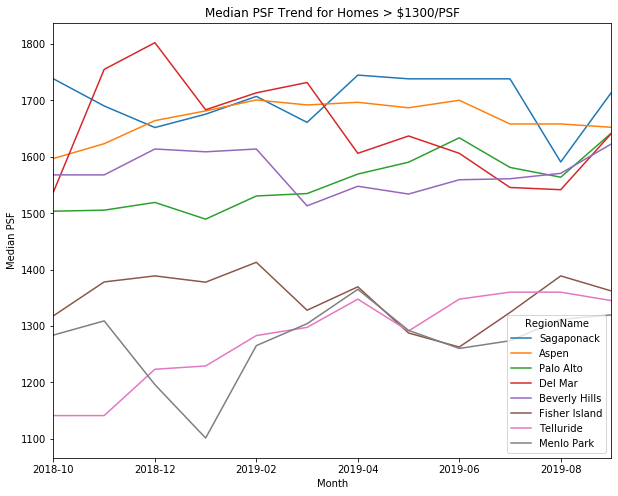

In [6]:
# Plot the prices of the top PSF cities
top_sale_t = top_sale.T
top_sale_t = top_sale_t[2:]
top_sale_t.head()
top_sale_t.plot(kind='line', figsize=(10,8))
plt.title(f'Median PSF Trend for Homes > ${top_psf}/PSF')
plt.ylabel('Median PSF')
plt.xlabel('Month')

In [8]:
# Create a dataframe of the cities with the PSF prices below x
bottom_psf = int(input('What PSF for the low?' ))
bottom_sale = sale_df[sale_df['2019-09'] < bottom_psf]
del bottom_sale['SizeRank']
low_count = bottom_sale['State'].count()
print(f'Total properties with median price < ${bottom_psf}/PSF: {low_count} cities')
bottom_sale.head(low_count)

What PSF for the low?50
Total properties with median price < $50/PSF: 53 cities


,State,CountyName,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
RegionName,,,,,,,,,,,,,,
Blackwell,OK,Kay County,52.359085,51.557093,49.034124,48.070740,45.686275,46.669104,52.130435,50.793651,51.488714,50.793651,49.115914,49.954782
Ilion,NY,Herkimer County,49.462366,50.337838,50.969479,50.969479,51.470588,50.761421,49.372057,47.673514,47.290661,49.622634,49.711725,49.734396
Elba,AL,Coffee County,56.675063,55.989902,54.500000,54.206621,54.640529,54.399435,54.206621,54.166667,49.545455,49.545455,49.545455,49.618321
Windsor,MO,Henry County,52.856135,50.952045,43.194803,49.330042,45.580589,48.247698,51.416309,54.106910,47.165354,47.313692,44.404468,49.610206
Struthers,OH,Mahoning County,56.193187,56.737072,54.099190,55.446836,59.465182,59.945988,51.685178,47.517305,47.944584,56.371925,50.976801,49.544996
Malden,MO,Dunklin County,52.285992,52.608239,52.608239,50.642674,49.750114,49.782806,49.627171,49.688642,49.627171,49.708129,48.652695,49.504337
Inkster,MI,Wayne County,43.322303,46.098563,47.671569,47.671569,46.098563,46.275633,47.727273,47.645308,49.306432,49.534161,51.244526,48.952651
Waverly,NY,Tioga County,66.588419,66.281139,66.800300,65.667451,63.641600,56.865465,55.063443,55.063443,51.647447,50.284064,47.619048,48.743804
Riverdale,IL,Cook County,39.312215,39.583333,42.892157,39.548135,42.180676,45.804897,48.366170,46.291195,46.099082,46.953737,49.135802,48.730822


Text(0.5, 0, 'Month')

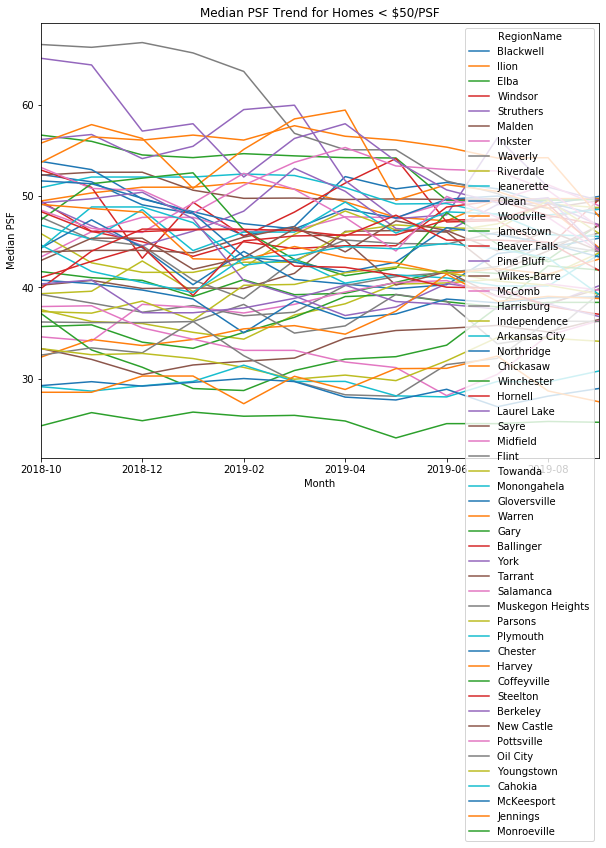

In [9]:
# # Plot the prices of the bottom PSF cities
bottom_sale_t = bottom_sale.T
bottom_sale_t = bottom_sale_t[2:]
bottom_sale_t.head()
bottom_sale_t.plot(kind='line', figsize=(10,8))
plt.title(f'Median PSF Trend for Homes < ${bottom_psf}/PSF')
plt.ylabel('Median PSF')
plt.xlabel('Month')

In [10]:
#Import median condo, multifamily, 2-5+ bed SFH, SFH, and duplex/triplex $/psf data

condo_df = pd.read_csv('City_MedianRentalPricePerSqft_CondoCoop.csv', encoding = 'Latin')
multi_df = pd.read_csv('City_MedianRentalPricePerSqft_Mfr5Plus.csv', encoding = 'Latin')
two_df = pd.read_csv('City_MedianRentalPricePerSqft_2Bedroom.csv', encoding = 'Latin')
three_df = pd.read_csv('City_MedianRentalPricePerSqft_3Bedroom.csv', encoding = 'Latin')
four_df = pd.read_csv('City_MedianRentalPricePerSqft_4Bedroom.csv', encoding = 'Latin')
five_df = pd.read_csv('City_MedianRentalPricePerSqft_5BedroomOrMore.csv', encoding = 'Latin')
sfr_df = pd.read_csv('City_MedianRentalPricePerSqft_Sfr.csv', encoding = 'Latin')
duptri_df = pd.read_csv('City_MedianRentalPricePerSqft_DuplexTriplex.csv', encoding = 'Latin')

# Drop column 'N/A' values for each
condo_df = condo_df.dropna(1).drop('SizeRank', axis = 1)
multi_df = multi_df.dropna(1).drop('SizeRank', axis = 1)
two_df = two_df.dropna(1).drop('SizeRank', axis = 1)
three_df = three_df.dropna(1).drop('SizeRank', axis = 1)
four_df = four_df.dropna(1).drop('SizeRank', axis = 1)
five_df = five_df.dropna(1).drop('SizeRank', axis = 1)
sfr_df = sfr_df.dropna(1).drop('SizeRank', axis = 1)
duptri_df = duptri_df.dropna(1).drop('SizeRank', axis = 1)
print('---To prevent dataframe population on ipynb---')

---To prevent dataframe population on ipynb---


In [11]:
# Create TTM average column for each rental dataframe
condo_df['Condo TTM Avg'] = round(condo_df.mean(numeric_only = True, axis = 1),1)*12
multi_df['Multi TTM Avg'] = round(multi_df.mean(numeric_only = True, axis = 1),1)*12
two_df['2 BR TTM Avg'] = round(two_df.mean(numeric_only = True, axis = 1),1)*12
three_df['3 BR TTM Avg'] = round(three_df.mean(numeric_only = True, axis = 1),1)*12
four_df['4 BR TTM Avg'] = round(four_df.mean(numeric_only = True, axis = 1),1)*12
five_df['5 BR TTM Avg'] = round(five_df.mean(numeric_only = True, axis = 1),1)*12
sfr_df['SFR TTM Avg'] = round(sfr_df.mean(numeric_only = True, axis = 1),1)*12
duptri_df['Duptri TTM Avg'] = round(duptri_df.mean(numeric_only = True, axis = 1),1)*12

two_df.loc[two_df['RegionName'] == 'Lawton']

,RegionName,State,Metro,CountyName,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2 BR TTM Avg
405,Lawton,OK,Lawton,Comanche County,0.641026,0.649117,0.667576,0.675676,0.678891,0.68125,0.666667,0.6625,0.676471,0.6625,0.668155,0.666667,8.4


In [12]:
# Drop most of the columns from the rental properties dataframes
condo_df_concise = condo_df[['RegionName', 'State','CountyName', 'Condo TTM Avg']]
multi_df_concise = multi_df[['RegionName', 'State','CountyName', 'Multi TTM Avg']]
two_df_concise = two_df[['RegionName', 'State','CountyName', '2 BR TTM Avg']]
three_df_concise = three_df[['RegionName', 'State','CountyName', '3 BR TTM Avg']]
four_df_concise = four_df[['RegionName', 'State','CountyName', '4 BR TTM Avg']]
five_df_concise = five_df[['RegionName', 'State','CountyName', '5 BR TTM Avg']]
sfr_df_concise = sfr_df[['RegionName', 'State','CountyName', 'SFR TTM Avg']]
duptri_df_concise = duptri_df[['RegionName', 'State','CountyName', 'Duptri TTM Avg']]

In [13]:
# Create TTM avg sale PSF column
sale_df['Sale TTM Avg'] = round(sale_df.mean(numeric_only = True, axis = 1),1)

sale_df_concise = sale_df[['State', 'CountyName', 'SizeRank', 'Sale TTM Avg']]
sale_df_concise.head()

,State,CountyName,SizeRank,Sale TTM Avg
RegionName,,,,
Sagaponack,NY,Suffolk County,7239,2125.3
Aspen,CO,Pitkin County,4391,1877.2
Palo Alto,CA,Santa Clara County,712,1490.5
Del Mar,CA,San Diego County,6607,2031.5
Beverly Hills,CA,Los Angeles County,1568,1573.1


In [14]:
# There are over 1,700 duplicate regional names so need to merge on multiple columns
merge_df = sale_df_concise.merge(condo_df_concise, on = ['RegionName', 'State', 'CountyName'], how = 'outer')
merge_df = merge_df.merge(two_df_concise, on = ['RegionName', 'State', 'CountyName'], how = 'outer')
merge_df = merge_df.merge(three_df_concise, on = ['RegionName', 'State', 'CountyName'], how = 'outer')
merge_df = merge_df.merge(four_df_concise, on = ['RegionName', 'State', 'CountyName'], how = 'outer')
merge_df = merge_df.merge(five_df_concise, on = ['RegionName', 'State', 'CountyName'], how = 'outer')
merge_df = merge_df.merge(sfr_df_concise, on = ['RegionName', 'State', 'CountyName'], how = 'outer')
merge_df = merge_df.merge(duptri_df_concise, on = ['RegionName', 'State', 'CountyName'], how = 'outer')
merge_df = merge_df.merge(multi_df_concise, on = ['RegionName', 'State', 'CountyName'], how = 'outer')
merge_df.loc[merge_df['RegionName'] == 'Lawton']

,RegionName,State,CountyName,SizeRank,Sale TTM Avg,Condo TTM Avg,2 BR TTM Avg,3 BR TTM Avg,4 BR TTM Avg,5 BR TTM Avg,SFR TTM Avg,Duptri TTM Avg,Multi TTM Avg
6954,Lawton,OK,Comanche County,447.0,100.7,NaN,8.4,7.2,8.4,NaN,7.2,7.2,9.6


In [15]:
merge_df['Condo Year Rent % of Sale'] = round((merge_df['Condo TTM Avg']) / merge_df['Sale TTM Avg'],2)*100
merge_df['2 BR Year Rent % of Sale'] = round((merge_df['2 BR TTM Avg']) / merge_df['Sale TTM Avg'],2)*100
merge_df['3 BR Year Rent % of Sale'] = round((merge_df['3 BR TTM Avg']) / merge_df['Sale TTM Avg'],2)*100
merge_df['4 BR Year Rent % of Sale'] = round((merge_df['4 BR TTM Avg']) / merge_df['Sale TTM Avg'],2)*100
merge_df['5 BR Year Rent % of Sale'] = round((merge_df['5 BR TTM Avg']) / merge_df['Sale TTM Avg'],2)*100
merge_df['SFR Year Rent % of Sale'] = round((merge_df['SFR TTM Avg'] ) / merge_df['Sale TTM Avg'],2)*100
merge_df['Duptri Year Rent % of Sale'] = round((merge_df['Duptri TTM Avg']) / merge_df['Sale TTM Avg'],2)*100
merge_df['Multi Year Rent % of Sale'] = round((merge_df['Multi TTM Avg']) / merge_df['Sale TTM Avg'],2)*100
merge_df.head()

,RegionName,State,CountyName,SizeRank,Sale TTM Avg,Condo TTM Avg,2 BR TTM Avg,3 BR TTM Avg,4 BR TTM Avg,5 BR TTM Avg,...,Duptri TTM Avg,Multi TTM Avg,Condo Year Rent % of Sale,2 BR Year Rent % of Sale,3 BR Year Rent % of Sale,4 BR Year Rent % of Sale,5 BR Year Rent % of Sale,SFR Year Rent % of Sale,Duptri Year Rent % of Sale,Multi Year Rent % of Sale
0,Sagaponack,NY,Suffolk County,7239.0,2125.3,NaN,NaN,NaN,214.8,226.8,...,NaN,NaN,NaN,NaN,NaN,10.0,11.0,11.0,NaN,NaN
1,Aspen,CO,Pitkin County,4391.0,1877.2,141.6,130.8,144.0,133.2,NaN,...,NaN,136.8,8.0,7.0,8.0,7.0,NaN,6.0,NaN,7.0
2,Palo Alto,CA,Santa Clara County,712.0,1490.5,43.2,48.0,46.8,43.2,NaN,...,NaN,50.4,3.0,3.0,3.0,3.0,NaN,3.0,NaN,3.0
3,Del Mar,CA,San Diego County,6607.0,2031.5,NaN,NaN,NaN,NaN,NaN,...,NaN,50.4,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0
4,Beverly Hills,CA,Los Angeles County,1568.0,1573.1,39.6,36.0,40.8,54.0,55.2,...,32.4,37.2,3.0,2.0,3.0,3.0,4.0,3.0,2.0,2.0


In [21]:
top_condo_locations = merge_df.sort_values('Condo Year Rent % of Sale', ascending = False)
top_2br_locations = merge_df.sort_values('2 BR Year Rent % of Sale', ascending = False)
top_3br_locations = merge_df.sort_values('3 BR Year Rent % of Sale', ascending = False)
top_4br_locations = merge_df.sort_values('4 BR Year Rent % of Sale', ascending = False)
top_5br_locations = merge_df.sort_values('5 BR Year Rent % of Sale', ascending = False)
top_sfr_locations = merge_df.sort_values('SFR Year Rent % of Sale', ascending = False)
top_duptri_locations = merge_df.sort_values('Duptri Year Rent % of Sale', ascending = False)
top_multi_locations = merge_df.sort_values('Multi Year Rent % of Sale', ascending = False)

In [22]:
top_condo_locations = top_condo_locations[['RegionName', 'State', 'CountyName', 'Sale TTM Avg', 'Condo TTM Avg', 'Condo Year Rent % of Sale']]
top_2br_locations = top_2br_locations[['RegionName', 'State', 'CountyName', 'Sale TTM Avg', '2 BR TTM Avg', '2 BR Year Rent % of Sale']]
top_3br_locations = top_3br_locations[['RegionName', 'State', 'CountyName', 'Sale TTM Avg', '3 BR TTM Avg', '3 BR Year Rent % of Sale']]
top_4br_locations = top_4br_locations[['RegionName', 'State', 'CountyName', 'Sale TTM Avg', '4 BR TTM Avg', '4 BR Year Rent % of Sale']]
top_5br_locations = top_5br_locations[['RegionName', 'State', 'CountyName', 'Sale TTM Avg', '5 BR TTM Avg', '5 BR Year Rent % of Sale']]
top_sfr_locations = top_sfr_locations[['RegionName', 'State', 'CountyName', 'Sale TTM Avg', 'SFR TTM Avg', 'SFR Year Rent % of Sale']]
top_duptri_locations = top_duptri_locations[['RegionName', 'State', 'CountyName', 'Sale TTM Avg', 'Duptri TTM Avg', 'Duptri Year Rent % of Sale']]
top_multi_locations = top_multi_locations[['RegionName', 'State', 'CountyName', 'Sale TTM Avg', 'Multi TTM Avg', 'Multi Year Rent % of Sale']]

In [23]:
# Region Search
region_lookup = input('Which region would you like to look up? ')

merge_df.loc[merge_df['RegionName'] == region_lookup]

Which region would you like to look up? Dallas


,RegionName,State,CountyName,SizeRank,Sale TTM Avg,Condo TTM Avg,2 BR TTM Avg,3 BR TTM Avg,4 BR TTM Avg,5 BR TTM Avg,...,Duptri TTM Avg,Multi TTM Avg,Condo Year Rent % of Sale,2 BR Year Rent % of Sale,3 BR Year Rent % of Sale,4 BR Year Rent % of Sale,5 BR Year Rent % of Sale,SFR Year Rent % of Sale,Duptri Year Rent % of Sale,Multi Year Rent % of Sale
1870,Dallas,TX,Dallas County,10.0,190.8,19.2,19.2,15.6,12.0,NaN,...,15.6,20.4,10.0,10.0,8.0,6.0,NaN,8.0,8.0,11.0
2177,Dallas,OR,Polk County,2593.0,373.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5175,Dallas,GA,Paulding County,506.0,143.3,NaN,NaN,10.8,8.4,NaN,...,NaN,NaN,NaN,NaN,8.0,6.0,NaN,7.0,NaN,NaN
5733,Dallas,NC,Gaston County,3184.0,338.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
merge_df.to_excel('Files/rental_property_value.xlsx')
top_condo_locations.to_excel('Files/condo_value.xlsx')
top_2br_locations.to_excel('Files/2br_value.xlsx')
top_3br_locations.to_excel('Files/3br_value.xlsx')
top_4br_locations.to_excel('Files/4br_value.xlsx')
top_5br_locations.to_excel('Files/5br_value.xlsx')
top_sfr_locations.to_excel('Files/sfr_value.xlsx')
top_duptri_locations.to_excel('Files/duptri_value.xlsx')
top_multi_locations.to_excel('Files/multi_value.xlsx')